In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
dataframe = pd.read_csv("./Pandas/Data/titanic_train.csv")

In [3]:
total_survived = 0
not_survive = 0
for i in dataframe['Survived']:
    if i == 1:
        total_survived = total_survived + 1
    else:
        not_survive = not_survive + 1

In [4]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# from sklearn.model_selection import train_test_split

# X, y = np.arange(891).reshape(891,5)
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataframe.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], inplace = True)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [9]:
male_and_female = []
for i, row in dataframe.iterrows():
    if row['Sex'] == 'female':
        male_and_female.append(0)
    else:
        male_and_female.append(1)
        
        
        

In [10]:
dataframe['Sex'] = male_and_female
dataframe.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,S
1,1,1,0,38.0,71.2833,C
2,1,3,0,26.0,7.9250,S
3,1,1,0,35.0,53.1000,S
4,0,3,1,35.0,8.0500,S


In [11]:
embarked_num = []
for i, row in dataframe.iterrows():
    if row['Embarked'] == 'S':
        embarked_num.append(0)
    elif row['Embarked'] == 'C':
        embarked_num.append(1)
    else:
        embarked_num.append(2)

In [12]:
dataframe['Embarked'] = embarked_num
dataframe.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,0
4,0,3,1,35.0,8.0500,0


In [13]:
mean = dataframe['Age'].mean()
dataframe['Age'].fillna(mean, inplace = True)

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [15]:
X = dataframe.drop(columns= ['Survived'])
y = dataframe['Survived'] 

In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,0
3,1,0,35.0,53.1000,0
4,3,1,35.0,8.0500,0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.82737724,  0.73769513, -0.5924806 , -0.50244517, -0.57186998],
       [-1.56610693, -1.35557354,  0.63878901,  0.78684529,  0.99112436],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.48885426, -0.57186998],
       ...,
       [ 0.82737724, -1.35557354,  0.        , -0.17626324, -0.57186998],
       [-1.56610693,  0.73769513, -0.2846632 , -0.04438104,  0.99112436],
       [ 0.82737724,  0.73769513,  0.17706291, -0.49237783,  2.5541187 ]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_shape = X.shape[1:], activation = 'relu', name = 'hidden1' ))
model.add(keras.layers.Dense(200, activation = 'relu', name = 'hidden2' ))
model.add(keras.layers.Dense(2, activation = 'softmax', name = 'output' ))

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [32]:
import datetime

early_stop_criteria = tf.keras.callbacks.EarlyStopping(
    
    monitor = "val_accuracy",
    min_delta = 0.001
    
)

modelcheck_criteria = tf.keras.callbacks.ModelCheckpoint(

    monitor = "val_loss",
    mode = "auto",
    save_weights_only = False,
    save_freq = "epoch",
    filepath = "./titanic_model"
    
    
    
)

logdir = "./titanic_models/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_criteria = tf.keras.callbacks.TensorBoard(

    log_dir = logdir

)


history = model.fit(X_train, y_train, epochs=30,
                   validation_data = (X_valid, y_valid), callbacks = [tensorboard_criteria])

Epoch 1/30
21/21 [==============================] - 0s 7ms/step - loss: 0.4055 - accuracy: 0.8263 - val_loss: 0.4265 - val_accuracy: 0.8206
Epoch 2/30
21/21 [==============================] - 0s 5ms/step - loss: 0.4053 - accuracy: 0.8278 - val_loss: 0.4261 - val_accuracy: 0.8206
Epoch 3/30
21/21 [==============================] - 0s 5ms/step - loss: 0.4054 - accuracy: 0.8278 - val_loss: 0.4265 - val_accuracy: 0.8206
Epoch 4/30
21/21 [==============================] - 0s 5ms/step - loss: 0.4050 - accuracy: 0.8263 - val_loss: 0.4266 - val_accuracy: 0.8206
Epoch 5/30
21/21 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.8263 - val_loss: 0.4259 - val_accuracy: 0.8206
Epoch 6/30
21/21 [==============================] - 0s 5ms/step - loss: 0.4050 - accuracy: 0.8278 - val_loss: 0.4254 - val_accuracy: 0.8251
Epoch 7/30
21/21 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.8278 - val_loss: 0.4256 - val_accuracy: 0.8206
Epoch 8/30
21/21 [==

In [28]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.434559,0.796407,0.427750,0.807175
1,0.433660,0.796407,0.427527,0.807175
2,0.432479,0.793413,0.427051,0.807175
3,0.431610,0.802395,0.426420,0.811659
4,0.430859,0.805389,0.426051,0.816144
5,0.429989,0.808383,0.425755,0.820628
6,0.428886,0.809880,0.425611,0.820628
7,0.428320,0.808383,0.425538,0.820628
8,0.427525,0.814371,0.425221,0.820628
9,0.426922,0.821856,0.425414,0.820628


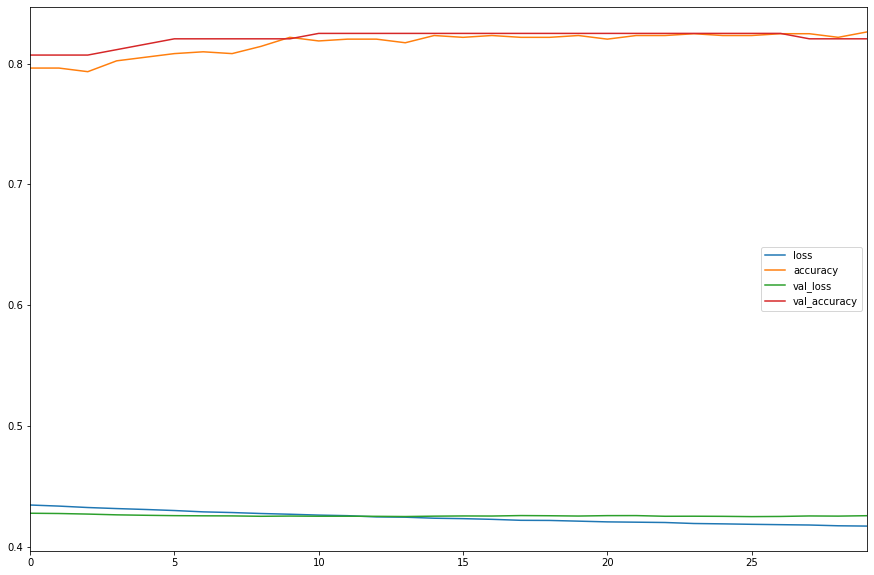

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(figsize = (15,10))

In [ ]:
# model.save("./Models/titanic_model.h5")

In [ ]:
titanic_model = keras.models.load_model("./Models/titanic_model.h5")

In [ ]:
X[5], y[5]

In [ ]:
titanic_model.predict(X[5:7])

In [ ]:
input_array = X[5].reshape(1,5)

In [ ]:
input_array.shape

In [ ]:
titanic_model.predict_classes(input_array)